# import packages & library

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  mean_absolute_error, mean_squared_error,r2_score,root_mean_squared_error
import matplotlib.pyplot as plt
from IPython.display import display

# Read the data Set 

In [3]:
ds= pd.read_csv('C:/Users/BADAWY/Desktop/DM Project/HousingData.csv')

# print Head of the dataset

In [4]:
print("data shape: ", ds.shape ,"\n")
print("data head: \n")
ds.head(15)

data shape:  (506, 14) 

data head: 



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,NaN,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,NaN,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


# see the columns

In [5]:
ds.columns.to_list()

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'MEDV']

# statistics about data set

In [6]:
ds.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# info about data

In [7]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


# Checks for missing values in each column

In [8]:
ds.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

# show the data types

In [9]:
ds.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

# DATA Preprocessing



## Handle Missing Values
### Handle Missing Values fill them with the mean 


In [10]:
ds = ds.fillna(ds.mean().iloc[0])

ds.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

# Drop columns with NaN values

In [11]:
ds = ds.dropna(axis=1)

# counts for the CHAS column


In [12]:
ds.CHAS.value_counts()

CHAS
0.000000    452
1.000000     34
3.611874     20
Name: count, dtype: int64

# Handle & Drop rows with any missing variables


## Label Encoding  Label Encoding 

In [13]:
encoder = LabelEncoder()
ds["CHAS"] = encoder.fit_transform(ds["CHAS"])
ds.CHAS.value_counts()


CHAS
0    452
1     34
2     20
Name: count, dtype: int64

# Handle Missing ValuesColumns After Encoding

In [14]:
print(ds.head(15))


       CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD  TAX  \
0   0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296   
1   0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242   
2   0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242   
3   0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222   
4   0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222   
5   0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222   
6   0.08829  12.5   7.87     2  0.524  6.012   66.6  5.5605    5  311   
7   0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311   
8   0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311   
9   0.17004  12.5   7.87     2  0.524  6.004   85.9  6.5921    5  311   
10  0.22489  12.5   7.87     0  0.524  6.377   94.3  6.3467    5  311   
11  0.11747  12.5   7.87     0  0.524  6.009   82.9  6.2267    5  311   
12  0.09378  12.5   7.87     0  0.524  5.889   39.0

# Feature Scaling

## Select features & exclude target variable 'MEDV'

In [15]:
X = ds.drop(columns=['MEDV'])
y = ds['MEDV']

# Standardize the features

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

 # Splitting the Data 80%  for training & 20% for testing

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train the Model & Make Predictions

In [18]:
# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
# Print actual vs predicted values
print("Actual values:", y_test.values)
print("Predicted values:", y_pred)

Actual values: [23.6 32.4 13.6 22.8 16.1 20.  17.8 14.  19.6 16.8 21.5 18.9  7.  21.2
 18.5 29.8 18.8 10.2 50.  14.1 25.2 29.1 12.7 22.4 14.2 13.8 20.3 14.9
 21.7 18.3 23.1 23.8 15.  20.8 19.1 19.4 34.7 19.5 24.4 23.4 19.7 28.2
 50.  17.4 22.6 15.1 13.1 24.2 19.9 24.  18.9 35.4 15.2 26.5 43.5 21.2
 18.4 28.5 23.9 18.5 25.  35.4 31.5 20.2 24.1 20.  13.1 24.8 30.8 12.7
 20.  23.7 10.8 20.6 20.8  5.  20.1 48.5 10.9  7.  20.9 17.2 20.9  9.7
 19.4 29.  16.4 25.  25.  17.1 23.2 10.4 19.6 17.2 27.5 23.  50.  17.9
  9.6 17.2 22.5 21.4]
Predicted values: [ 3.07313277e+01  3.37527561e+01  1.42390908e+01  2.48344347e+01
  1.85360640e+01  2.28554871e+01  1.95753809e+01  1.47806590e+01
  2.20206690e+01  2.07823809e+01  2.25402544e+01  1.94571660e+01
 -5.85050912e+00  2.15779061e+01  1.87936957e+01  2.92841938e+01
  2.00243989e+01  6.83094734e+00  4.13663223e+01  1.72808376e+01
  2.87712879e+01  3.03868883e+01  1.16792662e+01  2.66829229e+01
  1.73077534e+01  1.49863064e+01  2.47046628e+01  1.446834

# Evaluate the Model

In [19]:
# Calculate R² score
r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2}')

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# Calculate Root Mean Squared Error (RMSE)
rmse = root_mean_squared_error(y_test, y_pred,)
print(f'Root Mean Squared Error (RMSE): {rmse}')

R² Score: 0.6520136501485096
Mean Absolute Error (MAE): 3.204630942758557
Mean Squared Error (MSE): 25.519155522761476
Root Mean Squared Error (RMSE): 5.051648792499482


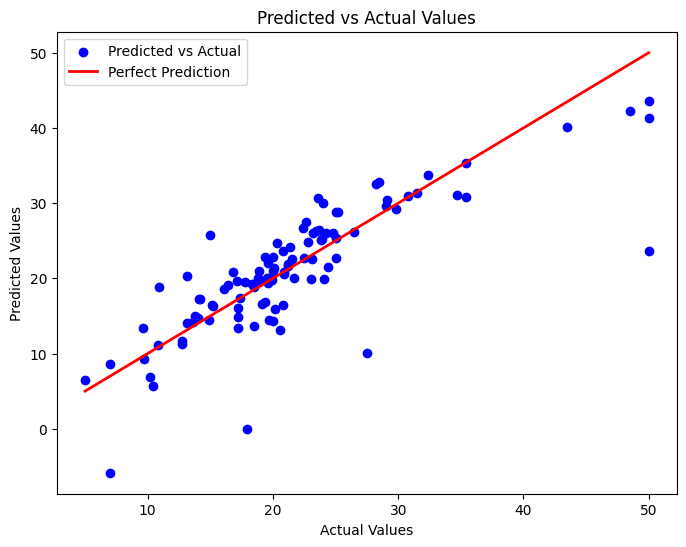

,Actual,Predicted
173,23.6,30.731328
274,32.4,33.752756
491,13.6,14.239091
72,22.8,24.834435
452,16.1,18.536064
...,...,...
412,17.9,-0.014621
436,9.6,13.451987
411,17.2,16.106468
86,22.5,22.711496


In [20]:
# Plot Predicted vs Actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.show()

# Display the first few rows of the comparison table
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
#print(comparison_df.head(15))
display(comparison_df)